# Membership Inference Attcak (MIA) Dataset D

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/PRIVACY'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for membership attack simulation
from membership_inference import evaluate_membership_attack

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/D_ContraceptiveMethod_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/D_ContraceptiveMethod_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/D_ContraceptiveMethod_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/D_ContraceptiveMethod_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/D_ContraceptiveMethod_Synthetic_WGANGP.csv'}
categorical_columns = ['wife_education','husband_education','wife_religion','wife_working','husband_occupation',
                        'standard_of_living_index','media_exposure','contraceptive_method_used']
data = dict()
Q=5

In [4]:
#iterate over all datasets filepaths and read each dataset
data = dict()

for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category').cat.codes
    numerical_columns = data[name].select_dtypes(include=['int64','float64']).columns.tolist()
    for col in numerical_columns :
        data[name][col] = pd.qcut(data[name][col], q=Q, duplicates='drop').cat.codes
data

{'Real':       wife_age  wife_education  husband_education  children  wife_religion  \
 0            3               1                  3         4              1   
 1            4               0                  2         3              1   
 2            3               0                  1         4              1   
 3            1               1                  1         3              1   
 4            1               2                  1         3              1   
 ...        ...             ...                ...       ...            ...   
 1173         2               1                  3         4              1   
 1174         0               3                  3         0              1   
 1175         1               2                  3         2              1   
 1176         3               3                  3         3              0   
 1177         2               3                  3         1              1   
 
       wife_working  husband_occupation  s

In [5]:
#read TRAIN real dataset
train_data = pd.read_csv(HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/D_ContraceptiveMethod_Real_Train.csv')
for col in categorical_columns :
    train_data[col] = train_data[col].astype('category').cat.codes
for col in numerical_columns :
    train_data[col] = pd.qcut(train_data[col], q=Q, duplicates='drop').cat.codes
train_data = train_data.sample(frac=1)
    
#read TEST real dataset
test_data = pd.read_csv(HOME_PATH + 'REAL DATASETS/TEST DATASETS/D_ContraceptiveMethod_Real_Test.csv')
for col in categorical_columns :
    test_data[col] = test_data[col].astype('category').cat.codes
for col in numerical_columns :
    test_data[col] = pd.qcut(test_data[col], q=Q, duplicates='drop').cat.codes
    
print(len(test_data))
test_data.index = range(len(train_data), len(train_data) + len(test_data))

real_data = (pd.concat([train_data[0:len(test_data)], test_data])).sample(frac=1)
real_data

295


,wife_age,wife_education,husband_education,children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
193,3,3,3,3,1,1,2,3,0,1
1289,2,3,3,2,0,0,0,2,0,0
1249,4,0,1,4,1,1,1,3,0,0
1218,0,3,3,0,1,1,1,3,0,0
691,3,1,1,4,1,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1343,2,1,3,2,1,1,1,3,0,2
772,1,3,3,0,0,0,1,3,0,2
1207,0,3,3,1,1,1,0,3,0,0
1190,3,3,3,4,1,1,2,3,0,1


In [6]:
thresholds = [0.4, 0.3, 0.2, 0.1]
props = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

train_data_indexes = train_data.index.tolist()
precision_values_all = dict()
accuracy_values_all = dict()

for name in SYNTHESIZERS :
    print(name)
    precision_values = dict()
    accuracy_values = dict()
    
    for th in thresholds :
        precision_values[th] = []
        accuracy_values[th] = []
        
        for p in props :
            
            attacker_data = real_data.iloc[0:int(len(real_data)*p)]
            precision_vals, accuracy_vals = evaluate_membership_attack(attacker_data, train_data_indexes, data[name], th)
            
            precision_values[th].append(precision_vals)
            accuracy_values[th].append(accuracy_vals)
            
            print('Proportion ', p, ' Threshold ', th, ' analysed')
            print('- mean precision', np.mean(precision_values[th]))
            print('- mean accuracy', np.mean(accuracy_values[th]))
    print('###################################################')
    
    precision_values_all[name] = precision_values
    accuracy_values_all[name] = accuracy_values

GM
Proportion  0.2  Threshold  0.4  analysed
- mean precision 0.5
- mean accuracy 0.5
Proportion  0.3  Threshold  0.4  analysed
- mean precision 0.5014124293785311
- mean accuracy 0.5014124293785311
Proportion  0.4  Threshold  0.4  analysed
- mean precision 0.49811676082862527
- mean accuracy 0.49811676082862527
Proportion  0.5  Threshold  0.4  analysed
- mean precision 0.5015536723163843
- mean accuracy 0.5015536723163843
Proportion  0.6  Threshold  0.4  analysed
- mean precision 0.5057627118644069
- mean accuracy 0.5057627118644069
Proportion  0.7  Threshold  0.4  analysed
- mean precision 0.5074253430185635
- mean accuracy 0.5074253430185635
Proportion  0.8  Threshold  0.4  analysed
- mean precision 0.5081805603597372
- mean accuracy 0.5081805603597372
Proportion  0.9  Threshold  0.4  analysed
- mean precision 0.5079819074522465
- mean accuracy 0.5079819074522465
Proportion  1  Threshold  0.4  analysed
- mean precision 0.5070950288464413
- mean accuracy 0.5070950288464413
Proportion

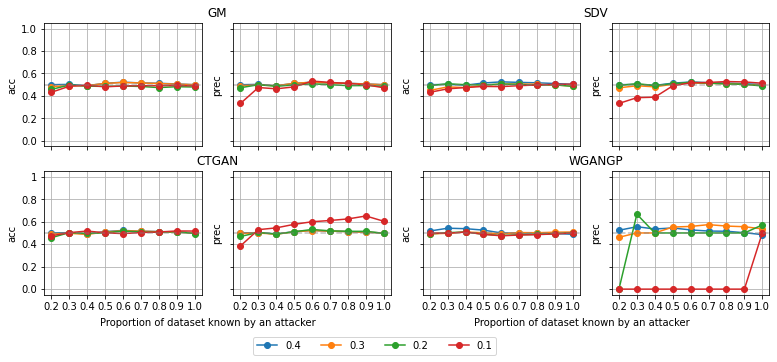

In [7]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(13,2.5*2))
idx = {SYNTHESIZERS[0] : {'accuracy' : [0,0], 'precision' : [0,1]},
       SYNTHESIZERS[1] : {'accuracy' : [0,2], 'precision' : [0,3]},
       SYNTHESIZERS[2] : {'accuracy' : [1,0], 'precision' : [1,1]},
       SYNTHESIZERS[3] : {'accuracy' : [1,2], 'precision' : [1,3]}}
first = True
for name in SYNTHESIZERS :
    ax_pre = axs[idx[name]['precision'][0], idx[name]['precision'][1]]
    ax_acc = axs[idx[name]['accuracy'][0], idx[name]['accuracy'][1]]
    precision_values = precision_values_all[name]
    accuracy_values = accuracy_values_all[name]
    
    for i in range(0,len(thresholds)) :
        ax_pre.plot(props, precision_values[thresholds[i]], 'o-', color=colors[i])
        ax_acc.plot(props, accuracy_values[thresholds[i]], 'o-', color=colors[i])
    
    ax_pre.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    ax_acc.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    ax_pre.set_ylabel('prec')
    ax_acc.set_title(name, fontsize=12)
    ax_acc.title.set_position([1.1, 1.03])
    ax_pre.set_ylim(-0.05,1.05)
    ax_acc.set_ylabel('acc')
    ax_acc.set_ylim(-0.05,1.05)
    ax_acc.grid(True)
    ax_pre.grid(True)
    ax_acc.set_yticks([0.0,0.2,0.4,0.6,0.8,1])
    ax_pre.set_yticks([0.0,0.2,0.4,0.6,0.8,1])
    ax_acc.set_xticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    ax_pre.set_xticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    
    if first == False :
        ax_acc.set_yticklabels([])
    else :
        first = False
        
    ax_pre.set_yticklabels([])
    ax_acc.set_xticklabels([])
    ax_pre.set_xticklabels([])
        

axs[idx['CTGAN']['accuracy'][0],idx['CTGAN']['accuracy'][1]].set_yticklabels([0.0,0.2,0.4,0.6,0.8,1])   
axs[idx['CTGAN']['accuracy'][0],idx['CTGAN']['accuracy'][1]].set_xticklabels([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])  
axs[idx['CTGAN']['precision'][0],idx['CTGAN']['precision'][1]].set_xticklabels([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
axs[idx['WGANGP']['accuracy'][0],idx['WGANGP']['accuracy'][1]].set_xticklabels([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
axs[idx['WGANGP']['precision'][0],idx['WGANGP']['precision'][1]].set_xticklabels([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
fig.text(0.7, 0.04, 'Proportion of dataset known by an attacker', ha='center')
fig.text(0.3, 0.04, 'Proportion of dataset known by an attacker', ha='center')
ax_pre.legend(thresholds, ncol=len(thresholds), bbox_to_anchor=(-0.7, -0.3))
fig.tight_layout()
#fig.suptitle('Membership Inference Tests Results \n Dataset F - Indian Liver Patient', fontsize=18)
fig.savefig('INFERENCE TESTS RESULTS/MEMBERSHIP INFERENCE TESTS RESULTS.svg', bbox_inches='tight')